In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# About Dataset
Dataset Overview:
Welcome to the Retina Blood Vessel Segmentation dataset, a valuable resource for advancing the field of medical image analysis and enhancing the diagnosis of retinal vascular diseases. This dataset contains a comprehensive collection of retinal fundus images, meticulously annotated for blood vessel segmentation. Accurate segmentation of blood vessels is a critical task in ophthalmology as it aids in the early detection and management of various retinal pathologies, such as diabetic retinopathy and macular degeneration.

Content:
The dataset comprises a total of X high-resolution retinal fundus images captured using state-of-the-art imaging equipment. Each image comes with corresponding pixel-level ground truth annotations indicating the exact location of blood vessels. These annotations facilitate the development and evaluation of advanced segmentation algorithms.

Key Features:

Image Size: The images in the dataset are of varying dimensions, ranging from XXX pixels to XXX pixels, mimicking the real-world diversity of retinal images.
Annotations: For each image, corresponding pixel-wise annotations in a binary mask format are provided. Blood vessel pixels are marked as 1, while background pixels are labeled as 0.
Pathological Variation: The dataset encompasses a spectrum of retinal conditions, including varying vessel widths, branching patterns, and presence of anomalies, making it suitable for evaluating the robustness of segmentation models.
Use Cases:
Researchers and practitioners in the fields of medical image analysis, computer vision, and artificial intelligence will find this dataset invaluable for several applications:

Algorithm Development: Use the dataset to train and test innovative segmentation algorithms, leveraging the precise annotations to achieve accurate and reliable results.
Disease Detection: Create models that can assist in the early detection of retinal pathologies, contributing to timely medical interventions.
Education: The dataset can be used for educational purposes to help students and professionals understand the complexities of retinal blood vessel structure.
Evaluation Metrics:
Performance evaluation will primarily involve measuring the segmentation accuracy against the ground truth annotations. Common metrics such as Intersection over Union (IoU), Dice Coefficient, and pixel-wise accuracy can be employed to quantify the model's performance.

In [2]:
pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.1/605.1 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.17
    Uninstalling albucore-0.0.17:
      Successfully uninstalled albucore-0.0.17
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.17
    Uninstalling albumentations-1.4.17:
      Successfully uninstalled albumentations-1.4.17
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import layers, models
from tensorflow import keras 
import cv2
import glob
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D,Conv2DTranspose,concatenate
from albumentations import Compose, HorizontalFlip, VerticalFlip, Rotate

In [4]:
# pip install -U albumentations

In [5]:
def load_images_from_folder(folder):
    images=[]
    for filename in glob.glob(os.path.join(folder,'*.png')):
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

# #ملخص:
# #الدالة load_images_from_folder تقوم بما يلي:
# تستقبل مسار المجلد الذي يحتوي على الصور.
# تبحث في المجلد عن جميع الصور التي تنتهي بالامتداد .png.
# تقوم بقراءة كل صورة وتحويلها إلى صورة ذات تدرجات رماديّة.
# تتحقق من أن الصورة تم تحميلها بنجاح.
# تقوم بتخزين الصور في قائمة وتعيد هذه القائمة في النهاية. #

In [6]:
def load_images_from_folder(folder):
    images=[]
    for filename in glob.glob(os.path.join(folder,'*.png')):
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [7]:
def load_images_from_folder_image(folder):
    images=[]
    for filename in glob.glob(os.path.join(folder,'*.png')):
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        if img is not None:
            images.append(img)
    return images

In [8]:
# Paths to train images, test images, and masks
train_image=load_images_from_folder_image("/kaggle/input/retina-blood-vessel/Data/train/image")
train_mask=load_images_from_folder("/kaggle/input/retina-blood-vessel/Data/train/mask")
test_image=load_images_from_folder_image("/kaggle/input/retina-blood-vessel/Data/test/image")
test_mask=load_images_from_folder("/kaggle/input/retina-blood-vessel/Data/test/mask")

In [9]:
def resize_images(images, target_size=(256, 256)):
    resized_images = []  # استخدام اسم متغير صحيح
    for img in images:
        resized_img = cv2.resize(img, target_size)  # تغيير حجم الصورة
        resized_images.append(resized_img)
    return np.array(resized_images)  # تحويل القائمة إلى مصفوفة numpy


# ملخص:
# الدالة resize_images تقوم بما يلي:

# تستقبل قائمة من الصور (images) وحجم مستهدف (target_size).
# تقوم بتكرار كل صورة في القائمة وتغيير حجمها إلى الحجم الجديد المحدد.
# تقوم بإضافة الصورة المعدلة إلى قائمة.
# في النهاية، تعيد قائمة الصور بعد تغيير حجمها في شكل مصفوفة NumPy.

In [10]:
# Resize images and masks
train_images = resize_images(train_image)
train_masks = resize_images(train_mask)
test_images = resize_images(test_image)
test_masks = resize_images(test_mask)

In [11]:
#normalizing the images
train_images = train_images / 255.0
train_masks = train_masks / 255.0
test_images = test_images / 255.0
test_masks = test_masks / 255.0

In [12]:
# #adding a channel dimension
#train_images = train_images[..., np.newaxis]
train_masks = train_masks[..., np.newaxis]
#test_images = test_images[..., np.newaxis]
test_masks = test_masks[..., np.newaxis]

In [13]:
print(f"Train images shape: {train_images.shape}")
print(f"Train masks shape: {train_masks.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test masks shape: {test_masks.shape}")

Train images shape: (80, 256, 256, 3)
Train masks shape: (80, 256, 256, 1)
Test images shape: (20, 256, 256, 3)
Test masks shape: (20, 256, 256, 1)


In [14]:
def augment_data(images, masks):
    augmented_images = []
    augmented_masks = []
    aug = Compose([HorizontalFlip(p=0.5), VerticalFlip(p=0.5), Rotate(limit=30, p=0.5)])
    for img, mask in zip(images, masks):
        augmented = aug(image=img, mask=mask)
        augmented_images.append(augmented['image'])
        augmented_masks.append(augmented['mask'])
    return np.array(augmented_images), np.array(augmented_masks)

train_images_aug, train_masks_aug = augment_data(train_images, train_masks)

# ملخص:
# الدالة تقوم بتطبيق ثلاث تحولات لزيادة البيانات: التقليب الأفقي، التقليب العمودي، والدوران.
# يتم تطبيق هذه التحولات على كل صورة وقناع مترافقين معًا.
# يتم تخزين الصور المعدلة والأقنعة المعدلة في قوائم وإرجاعها كمصفوفات numpy.

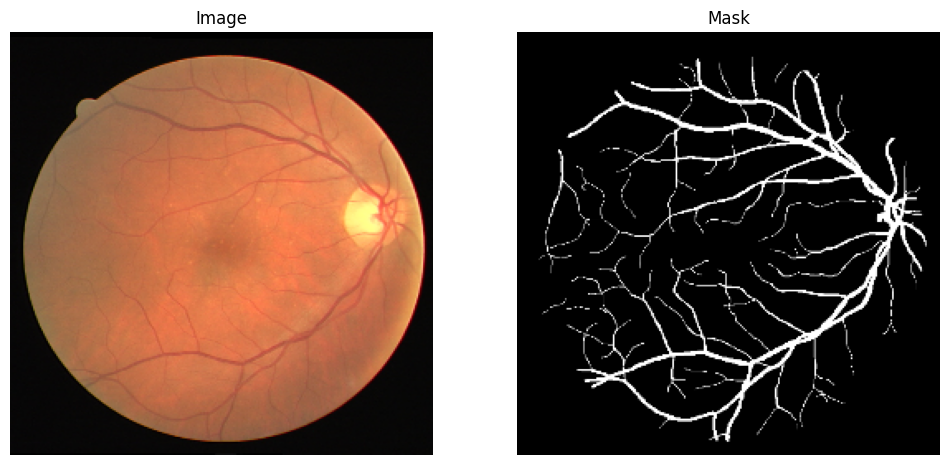

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# مسار الصور والأقنعة
image_path = '/kaggle/input/retina-blood-vessel/Data/train/image/1.png'
mask_path = '/kaggle/input/retina-blood-vessel/Data/train/mask/1.png'

# تحميل الصورة والقناع
image = load_img(image_path, target_size=(256, 256))
mask = load_img(mask_path, target_size=(256, 256), color_mode='grayscale')

# تحويل الصور إلى مصفوفات
image_array = img_to_array(image) / 255.0  # مقياس بين 0 و 1
mask_array = img_to_array(mask) / 255.0

# إنشاء الشكل لعرض الصور
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# عرض الصورة
axes[0].imshow(image_array)
axes[0].set_title('Image')
axes[0].axis('off')

# عرض القناع
axes[1].imshow(mask_array, cmap='gray')
axes[1].set_title('Mask')
axes[1].axis('off')

# عرض الصورة
plt.show()


 # U-Net
يُعد U-Net أحد أشهر النماذج المستخدمة في مهام التقطيع (Segmentation)، خاصة في مجالات مثل الرؤية الحاسوبية و الطب. يتميز U-Net بهيكله المتقاطع (Encoder-Decoder) الذي يسمح بتحديد التفاصيل الدقيقة في الصورة، وهو مثالي للمشاريع التي تتعامل مع بيانات طبية أو صور عالية الدقة.

In [16]:
from tensorflow.keras import layers, models

def unet_model(input_size=(256, 256, 3)):  # استخدم أبعاد قابلة للتقسيم
    inputs = layers.Input(input_size)
    
    # Encoder (Contracting path)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = layers.MaxPooling2D((2, 2))(c1)  # تقليص الأبعاد إلى نصف الحجم
    
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = layers.MaxPooling2D((2, 2))(c2)  # تقليص الأبعاد مرة أخرى

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    p3 = layers.MaxPooling2D((2, 2))(c3)  # تقليص الأبعاد مرة أخرى

    # Decoder (Expansive path)
    u4 = layers.UpSampling2D((2, 2))(p3)  # توسيع الأبعاد
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
    
    u5 = layers.UpSampling2D((2, 2))(c4)  # توسيع الأبعاد مرة أخرى
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5)

    u6 = layers.UpSampling2D((2, 2))(c5)  # توسيع الأبعاد مرة أخرى
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u6)
    
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c6)  # قناة واحدة في الإخراج
    
    model = models.Model(inputs, outputs)
    return model

# إنشاء النموذج#
model = unet_model()
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 1)    │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481,601 (1.84 MB)

 Trainable params: 481,601 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_images_aug, train_masks_aug,epochs=200, batch_size=16)

Epoch 1/200


I0000 00:00:1731414976.434234     119 service.cc:145] XLA service 0x7c33dc08e0f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731414976.434298     119 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731414976.434302     119 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/5 ━━━━━━━━━━━━━━━━━━━━ 1:20 20s/step - accuracy: 0.1496 - loss: 0.6972

I0000 00:00:1731414993.737594     119 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.5522 - loss: 0.6029
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8375 - loss: 0.4032
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8414 - loss: 0.3337
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8384 - loss: 0.2870
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8384 - loss: 0.2778
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8403 - loss: 0.2724
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8384 - loss: 0.2716
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8386 - loss: 0.2709
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8370 - loss: 0.2711
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8410 - loss: 0.2652
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8384 - loss: 0.2682
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8412 - l

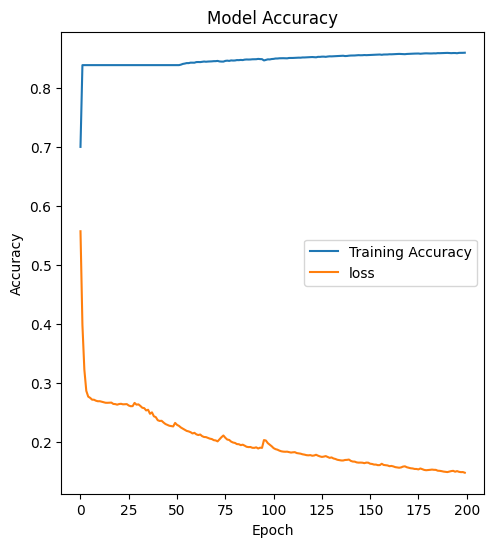

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# رسم دقة التدريب والتحقق
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [20]:
test_loss, test_accuracy = model.evaluate(test_images, test_masks)
print(f"test_accuracy: {test_accuracy}")
print(f"test_loss: {test_loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.8581 - loss: 0.1536
test_accuracy: 0.8580566644668579
test_loss: 0.15358980000019073


In [21]:
model.save("Retina Blood Vessel4.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


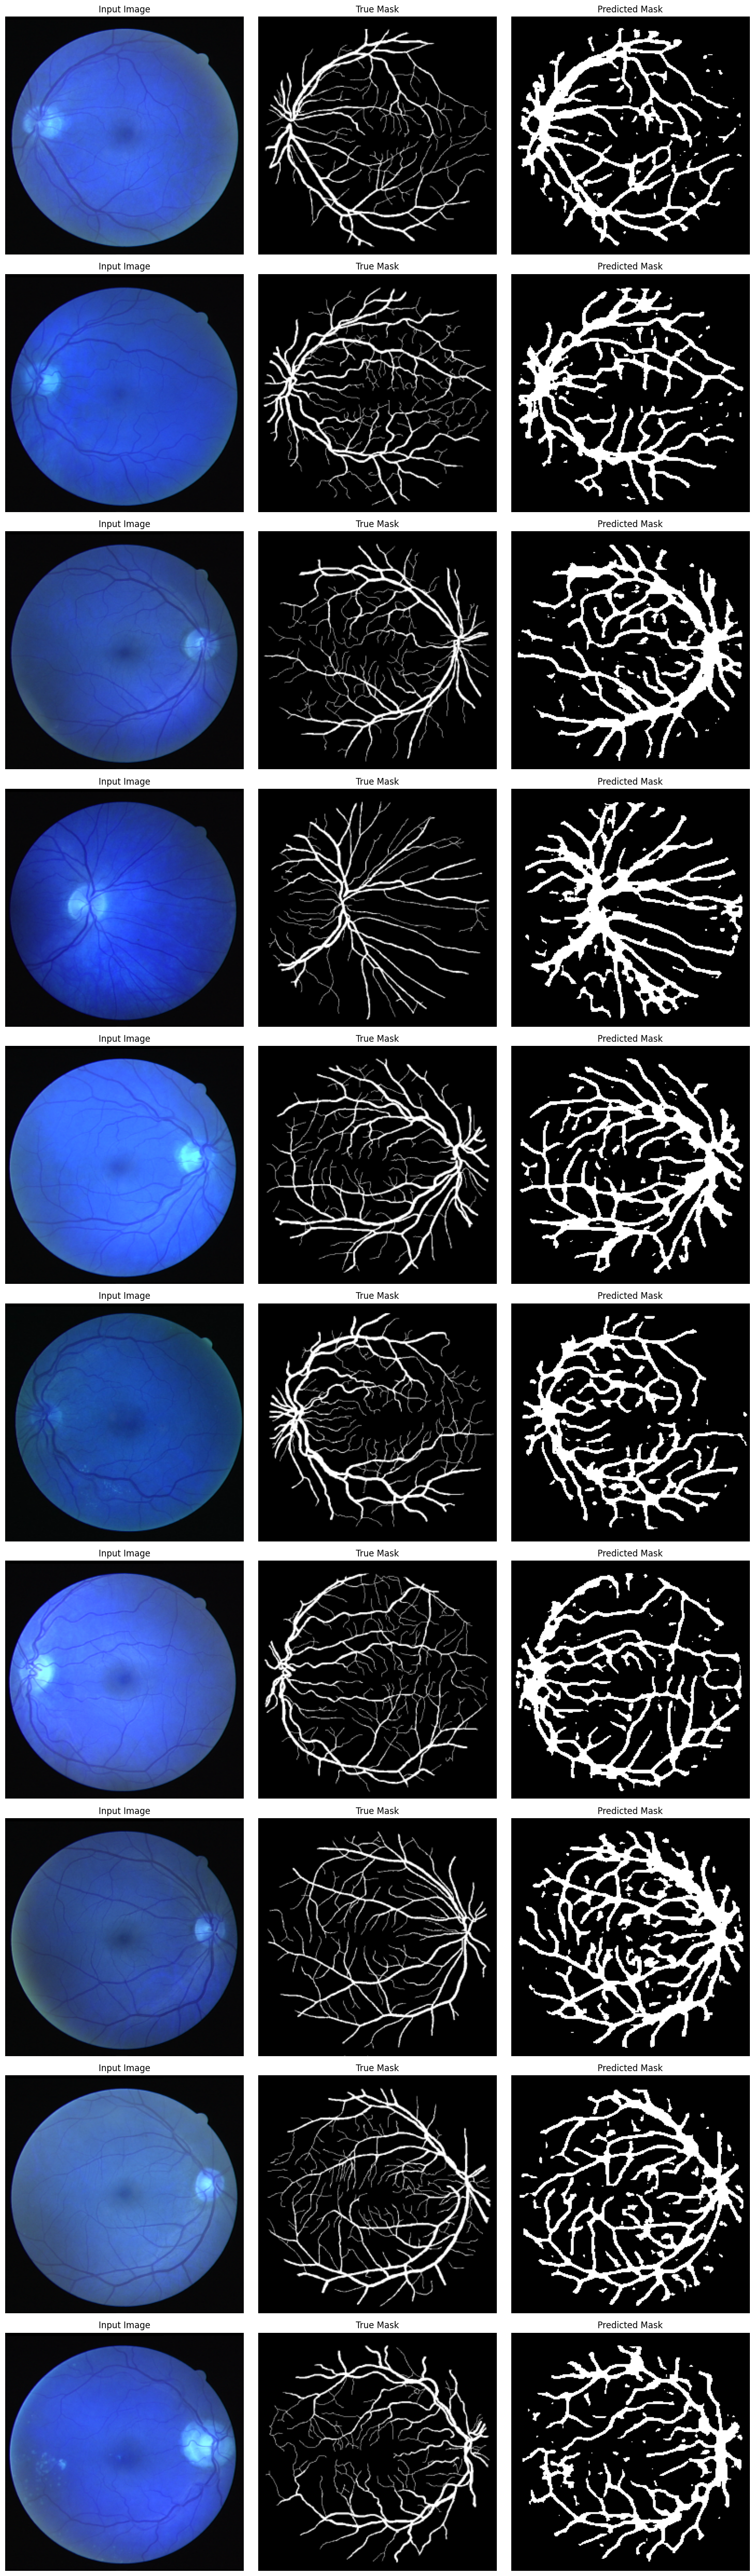

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(images, masks, predictions, num=5):
    rows = num
    cols = 3  # one column for input image, one for true mask, and one for predicted mask
    fig, axes = plt.subplots(rows, cols, figsize=(15, num * 5))

    for i in range(num):
        # Input image (Keep it in RGB)
        ax = axes[i, 0]
        ax.imshow(images[i].reshape(256, 256, 3))  # Ensure image remains in RGB
        ax.set_title('Input Image')
        ax.axis('off')
        
        # True mask (Convert to Grayscale for display)
        ax = axes[i, 1]
        ax.imshow(masks[i].reshape(256, 256), cmap='gray')  # Display mask in grayscale
        ax.set_title('True Mask')
        ax.axis('off')

        # Predicted mask (Convert to Grayscale for display)
        ax = axes[i, 2]
        ax.imshow(predictions[i].reshape(256, 256), cmap='gray')  # Display mask in grayscale
        ax.set_title('Predicted Mask')
        ax.axis('off')

    plt.tight_layout()
    plt.show()


# Get predictions
predictions = model.predict(test_images)
predictions = (predictions > 0.1).astype(np.uint8)

# Visualize predictions
visualize_predictions(test_images, test_masks, predictions, num=10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


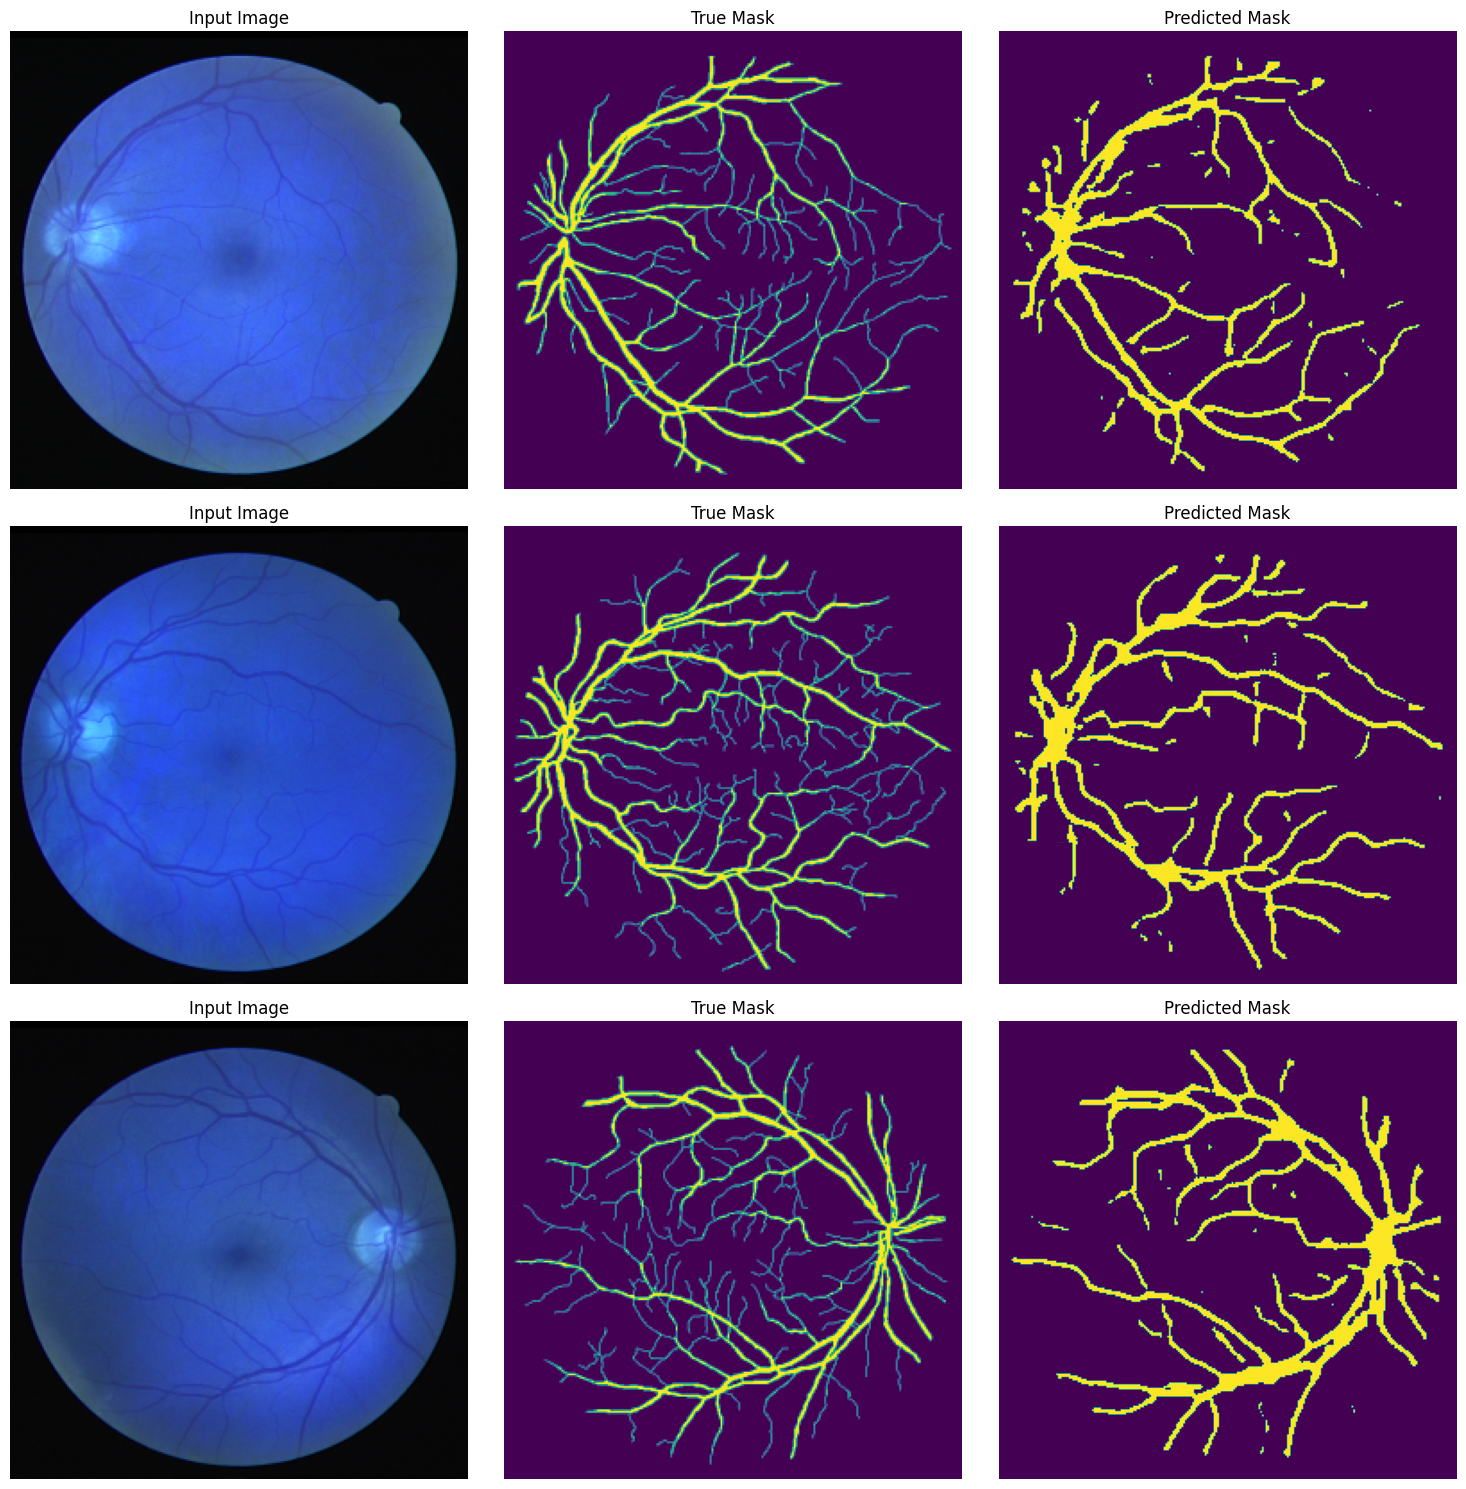

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions_with_color_overlay(images, masks, predictions, num=5):
    rows = num
    cols = 3  # one column for input image, one for true mask, and one for predicted mask
    fig, axes = plt.subplots(rows, cols, figsize=(15, num * 5))

    for i in range(num):
        # تأكد من أن الصورة المدخلة في الأبعاد الصحيحة (256, 256, 3)
        ax = axes[i, 0]
        if images[i].ndim == 2:  # إذا كانت الصورة بالأبيض والأسود
            ax.imshow(images[i], cmap='gray')
        else:  # إذا كانت الصورة ملونة
            ax.imshow(images[i])  # لا حاجة لإعادة تشكيل الصورة، استخدمها كما هي
        ax.set_title('Input Image')
        ax.axis('off')
        
        # الماسك الحقيقي مع تراكب الألوان
        ax = axes[i, 1]
        if masks[i].ndim == 2:  # إذا كان الماسك في شكل 2D
            ax.imshow(masks[i], cmap='jet', alpha=0.5)  # الماسك بتدرج ألوان
        else:  # إذا كان الماسك ملون
            ax.imshow(masks[i])  # استخدم الماسك الملون كما هو
        ax.set_title('True Mask')
        ax.axis('off')

        # الماسك المخرَج مع تراكب الألوان
        ax = axes[i, 2]
        if predictions[i].ndim == 2:  # إذا كان الماسك 2D
            ax.imshow(predictions[i], cmap='jet', alpha=0.5)  # تدرج ألوان للماسك المخرَج
        else:  # إذا كان الماسك ملون
            ax.imshow(predictions[i])  # استخدم الماسك الملون كما هو
        ax.set_title('Predicted Mask')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# التنبؤات
predictions = model.predict(test_images)
predictions = (predictions > 0.3).astype(np.uint8)

# عرض عينة من التنبؤات
visualize_predictions_with_color_overlay(test_images, test_masks, predictions, num=5)
